In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
if not os.path.exists('./pytorch-image-models'):
    ! git clone https://github.com/rwightman/pytorch-image-models.git

RESULTS_PATH = './pytorch-image-models/results/results-imagenet-real.csv'
filename = os.path.basename(RESULTS_PATH)
savename = filename.replace('results', 'tradeoff').replace('.csv', '.png')

In [3]:
df = pd.read_csv(RESULTS_PATH)
df

,model,top1,top1_err,top5,top5_err,param_count,img_size,cropt_pct,interpolation,top1_diff,top5_diff,rank_diff
0,beit_large_patch16_512,90.691,9.309,98.751,1.249,305.67,512,1.000,bicubic,2.089,0.095,0
1,beit_large_patch16_384,90.610,9.390,98.766,1.234,305.00,384,1.000,bicubic,2.206,0.158,0
2,tf_efficientnet_l2_ns,90.563,9.437,98.779,1.221,480.31,800,0.960,bicubic,2.215,0.131,0
3,tf_efficientnet_l2_ns_475,90.540,9.460,98.710,1.290,480.31,475,0.936,bicubic,2.308,0.164,0
4,convnext_xlarge_384_in22ft1k,90.452,9.548,98.672,1.328,350.20,384,1.000,bicubic,2.908,0.182,0
...,...,...,...,...,...,...,...,...,...,...,...,...
547,tf_mobilenetv3_small_075,72.810,27.190,90.036,9.964,2.04,224,0.875,bilinear,7.096,3.902,-1
548,dla46_c,72.607,27.393,90.499,9.501,1.30,224,0.875,bilinear,7.741,4.205,0
549,lcnet_050,70.393,29.607,88.825,11.175,1.88,224,0.875,bicubic,7.293,4.443,0
550,tf_mobilenetv3_small_minimal_100,70.111,29.889,88.507,11.493,2.04,224,0.875,bilinear,7.203,4.273,0


In [4]:
POPULAR_ARCHS = [
    # 'beit',
    'cait',
    'deit',
    # 'dm_nfnet',
    # 'efficientnet_',
    'efficientnetv2',
    # 'nfnet',
    # 'resnest',
    'resnet',
    'swin',
    # 'tf_efficientnet_',
    'tf_efficientnetv2',
    # 'convnext',
    'vit',
    'xcit'
]

In [5]:
def arch_type(model_name: str) -> str:
    for arch in POPULAR_ARCHS:
        if model_name.startswith(arch):
            return arch
    return ''

df['arch_type'] = df.model.map(arch_type)
df

,model,top1,top1_err,top5,top5_err,param_count,img_size,cropt_pct,interpolation,top1_diff,top5_diff,rank_diff,arch_type
0,beit_large_patch16_512,90.691,9.309,98.751,1.249,305.67,512,1.000,bicubic,2.089,0.095,0,
1,beit_large_patch16_384,90.610,9.390,98.766,1.234,305.00,384,1.000,bicubic,2.206,0.158,0,
2,tf_efficientnet_l2_ns,90.563,9.437,98.779,1.221,480.31,800,0.960,bicubic,2.215,0.131,0,
3,tf_efficientnet_l2_ns_475,90.540,9.460,98.710,1.290,480.31,475,0.936,bicubic,2.308,0.164,0,
4,convnext_xlarge_384_in22ft1k,90.452,9.548,98.672,1.328,350.20,384,1.000,bicubic,2.908,0.182,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,tf_mobilenetv3_small_075,72.810,27.190,90.036,9.964,2.04,224,0.875,bilinear,7.096,3.902,-1,
548,dla46_c,72.607,27.393,90.499,9.501,1.30,224,0.875,bilinear,7.741,4.205,0,
549,lcnet_050,70.393,29.607,88.825,11.175,1.88,224,0.875,bicubic,7.293,4.443,0,
550,tf_mobilenetv3_small_minimal_100,70.111,29.889,88.507,11.493,2.04,224,0.875,bilinear,7.203,4.273,0,


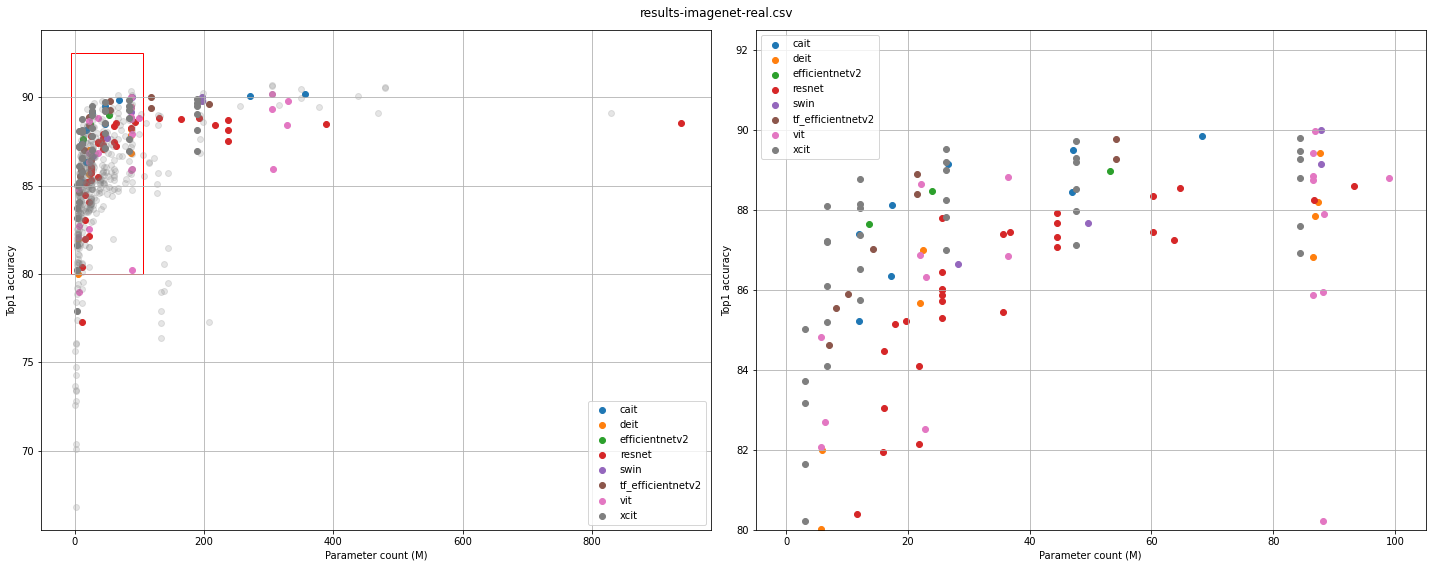

In [6]:
cmap = plt.get_cmap(lut=len(POPULAR_ARCHS))

xlim, ylim = (-5, 105), (80, 92.5)
xrange, yrange = xlim[1] - xlim[0], ylim[1] - ylim[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), tight_layout=True)
fig.suptitle(filename)
ax1.set_xlabel('Parameter count (M)')
ax1.set_ylabel('Top1 accuracy')

ax2.set_xlabel('Parameter count (M)')
ax2.set_ylabel('Top1 accuracy')

ax1.add_patch(patches.Rectangle((xlim[0], ylim[0]), xrange, yrange, edgecolor='red', fill=False))
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)

for i, arch in enumerate(POPULAR_ARCHS):
    df_arch = df[df.arch_type == arch]
    ax1.scatter(df_arch.param_count, df_arch.top1, label=arch)
    ax2.scatter(df_arch.param_count, df_arch.top1, label=arch)
    
df_arch = df[df.arch_type == '']
ax1.scatter(df_arch.param_count, df_arch.top1, c='gray', alpha=0.2)

ax1.legend()
ax1.grid(True)
ax2.legend()
ax2.grid(True)

plt.savefig(savename)
plt.show()